<a href="https://colab.research.google.com/github/LIZKA30/ML_2025_autumn/blob/main/Lab3_%D0%9A%D1%83%D0%B7%D0%BD%D0%B5%D1%86%D0%BE%D0%B2%D0%B0_%D0%95%D0%BB%D0%B8%D0%B7%D0%B0%D0%B2%D0%B5%D1%82%D0%B0_%D0%9D%D0%9F%D0%9C%D0%91%D0%94_01_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 ЧАСТЬ ЗАДАНИЯ

In [ ]:
1#
import pandas as pd

df = pd.read_csv("chipotle.tsv", sep="\t")

print(df.tail(10))

print("\nКоличество строк и столбцов:", df.shape)
print("\nНазвания столбцов:", df.columns.tolist())

      order_id  quantity            item_name  \
4612      1831         1        Carnitas Bowl   
4613      1831         1                Chips   
4614      1831         1        Bottled Water   
4615      1832         1   Chicken Soft Tacos   
4616      1832         1  Chips and Guacamole   
4617      1833         1        Steak Burrito   
4618      1833         1        Steak Burrito   
4619      1834         1   Chicken Salad Bowl   
4620      1834         1   Chicken Salad Bowl   
4621      1834         1   Chicken Salad Bowl   

                                     choice_description item_price  
4612  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...     $9.25   
4613                                                NaN     $2.15   
4614                                                NaN     $1.50   
4615   [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]     $8.75   
4616                                                NaN     $4.45   
4617  [Fresh Tomato Salsa, [Rice, Black Beans,

In [ ]:
2#
num_orders = df['order_id'].nunique()

num_items = df['item_name'].nunique()

print("Количество заказов:", num_orders)
print("Количество уникальных товаров:", num_items)


Количество заказов: 1834
Количество уникальных товаров: 50


In [ ]:
3#
print(df.isnull().sum())

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


In [ ]:
df = df.fillna({col: "" for col in df.select_dtypes(include="object").columns})

df = df.fillna({col: 0 for col in df.select_dtypes(include="number").columns})

print(df.isnull().sum())


order_id              0
quantity              0
item_name             0
choice_description    0
item_price            0
dtype: int64


In [ ]:
4#
print("Текущий тип item_price:", df['item_price'].dtype)

df['item_price_num'] = df['item_price'].apply(lambda x: float(x.replace('$', '')))

print("\nНовый тип item_price_num:", df['item_price_num'].dtype)
print(df[['item_price', 'item_price_num']].head())

Текущий тип item_price: object

Новый тип item_price_num: float64
  item_price  item_price_num
0     $2.39             2.39
1     $3.39             3.39
2     $3.39             3.39
3     $2.39             2.39
4    $16.98            16.98


In [ ]:
stats = df['item_price_num'].agg(['mean', 'min', 'max'])

print(f"Средняя цена: {stats['mean']:.2f}")
print(f"Минимальная цена: {stats['min']:.2f}")
print(f"Максимальная цена: {stats['max']:.2f}")

Средняя цена: 7.46
Минимальная цена: 1.09
Максимальная цена: 44.25


In [ ]:
df.drop(columns=['item_price'], inplace=True)

print(df.head())
print("\nТекущие колонки:", df.columns.tolist())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price_num  
0                                                               2.39  
1                                       [Clementine]            3.39  
2                                            [Apple]            3.39  
3                                                               2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...           16.98  

Текущие колонки: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price_num']


In [ ]:
5#
df['price_per_item'] = df['item_price_num'] / df['quantity']

unique_items = df[['item_name', 'price_per_item']].drop_duplicates()

sorted_items = unique_items.sort_values('price_per_item')

cheapest = sorted_items.head(5)
print("Самые дешёвые товары:")
for _, row in cheapest.iterrows():
    print(f"{row['item_name']} — {row['price_per_item']:.2f}")

priciest = sorted_items.tail(5)
print("\nСамые дорогие товары:")
for _, row in priciest.iterrows():
    print(f"{row['item_name']} — {row['price_per_item']:.2f}")

Самые дешёвые товары:
Canned Soda — 1.09
Bottled Water — 1.09
Canned Soft Drink — 1.25
Bottled Water — 1.50
Side of Chips — 1.69

Самые дорогие товары:
Barbacoa Soft Tacos — 11.75
Carnitas Soft Tacos — 11.75
Carnitas Salad Bowl — 11.89
Barbacoa Salad Bowl — 11.89
Steak Salad Bowl — 11.89


In [ ]:
6#
chicken_bowl_multi = df[(df['item_name'] == 'Chicken Bowl') & (df['quantity'] > 1)]

count = chicken_bowl_multi.shape[0]

print(f"Количество заказов с более чем 1 Chicken Bowl: {count}")


Количество заказов с более чем 1 Chicken Bowl: 33


In [ ]:
7#
orders = df.groupby('order_id').agg({
    'item_price_num': 'sum',
    'quantity': 'sum'
})

average_check = orders['item_price_num'].mean()

average_items = orders['quantity'].mean()

print(f"Средний чек: {average_check:.2f}")
print(f"Среднее количество товаров в заказе: {average_items:.2f}")

Средний чек: 18.81
Среднее количество товаров в заказе: 2.71


In [ ]:
8#
orders = df.groupby('order_id')['quantity'].sum()

single_item_orders = (orders == 1).sum()

print("Количество заказов с ровно 1 товаром:", single_item_orders)

Количество заказов с ровно 1 товаром: 56


In [ ]:
9#
category_counts = df.groupby('item_name').agg({'quantity': 'sum'})

most_popular_category = category_counts['quantity'].idxmax()
most_popular_count = category_counts['quantity'].max()

print(f"Самая популярная категория: {most_popular_category} ({most_popular_count} товаров)")


Самая популярная категория: Chicken Bowl (761 товаров)


In [ ]:
10#
burritos = df[df['item_name'].str.contains('Burrito', case=False, na=False)]

burrito_types = burritos['item_name'].unique()
print("Виды Burrito:", burrito_types)

burrito_stats = burritos.groupby('item_name').agg({
    'quantity': 'sum',
    'item_price_num': 'max'
})

most_popular = burrito_stats['quantity'].idxmax()
most_expensive = burrito_stats['item_price_num'].idxmax()

print(f"Чаще всего покупают: {most_popular}")
print(f"Самый дорогой Burrito: {most_expensive}")

Виды Burrito: ['Steak Burrito' 'Chicken Burrito' 'Barbacoa Burrito' 'Carnitas Burrito'
 'Veggie Burrito' 'Burrito']
Чаще всего покупают: Chicken Burrito
Самый дорогой Burrito: Chicken Burrito


In [ ]:
11#
def has_item_over_40pct(order):
    total = order['item_price_num'].sum()
    return (order['item_price_num'] > 0.4 * total).any()

orders_over_40 = df.groupby('order_id').apply(has_item_over_40pct).sum()

print(f"Количество заказов с товаром >40% от суммы заказа: {orders_over_40}")


Количество заказов с товаром >40% от суммы заказа: 1624


/tmp/ipython-input-3081369036.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  orders_over_40 = df.groupby('order_id').apply(has_item_over_40pct).sum()


In [ ]:
12#
mask = (df['item_name'] == 'Diet Coke') & (df['item_price_num'] == 1.25)

old_revenue = (df.loc[mask, 'item_price_num'] * df.loc[mask, 'quantity']).sum()

df.loc[mask, 'item_price_num'] = 1.35

new_revenue = (df.loc[df['item_name'] == 'Diet Coke', 'item_price_num'] *
               df.loc[df['item_name'] == 'Diet Coke', 'quantity']).sum()

increase_percent = ((new_revenue - old_revenue) / old_revenue) * 100

print(f"Процент увеличения выручки с Diet Coke: {increase_percent:.2f}%")




Процент увеличения выручки с Diet Coke: nan%


/tmp/ipython-input-1037957264.py:11: RuntimeWarning: invalid value encountered in scalar divide
  increase_percent = ((new_revenue - old_revenue) / old_revenue) * 100


In [ ]:
13#
data = [
    [1, "Убийственный класс", "комедия/боевик"],
    [2, "Стальной Алхимик: Братство", "боевик"],
    [3, "Саики Кусуо", "комедия"],
    [4, "Твоя апрельская ложь", "романтика/драма"],
    [5, "Нитидзё", "комедия"],
    [6, "Steins;Gate", "фантастика/триллер"],
    [7, "Хоримия", "романтика"],
    [8, "Моя геройская академия", "комедия/боевик"],
    [9, "Fate/Zero", "триллер/боевик"],
    [10, "Корзинка фруктов", "романтика"],
    [11, "Плутон", "триллер/боевик"],
    [12, "Галактика Татами", "комедия/фантастика"],
    [13, "Атака титанов", "боевик/триллер"],
    [14, "Ковбой Бибоп", "фантастика/боевик"],
    [15, "Шова Генроку Ракуго Синдзю", "драма"]
]

df_new = pd.DataFrame(data, columns=['index', 'column1', 'column2'])

df_new.set_index('index', inplace=True)

print(df_new)



                          column1             column2
index                                                
1              Убийственный класс      комедия/боевик
2      Стальной Алхимик: Братство              боевик
3                     Саики Кусуо             комедия
4            Твоя апрельская ложь     романтика/драма
5                         Нитидзё             комедия
6                     Steins;Gate  фантастика/триллер
7                         Хоримия           романтика
8          Моя геройская академия      комедия/боевик
9                       Fate/Zero      триллер/боевик
10               Корзинка фруктов           романтика
11                         Плутон      триллер/боевик
12               Галактика Татами  комедия/фантастика
13                  Атака титанов      боевик/триллер
14                   Ковбой Бибоп   фантастика/боевик
15     Шова Генроку Ракуго Синдзю               драма


In [ ]:
df_new.to_csv('my_dataframe.csv', index=False, header=False)

print("DataFrame сохранён в файл my_dataframe.csv без индексов и названий столбцов.")

DataFrame сохранён в файл my_dataframe.csv без индексов и названий столбцов.


In [ ]:
import pandas as pd

df_check = pd.read_csv('my_dataframe.csv', header=None)

print(df_check.head())

                            0                1
0          Убийственный класс   комедия/боевик
1  Стальной Алхимик: Братство           боевик
2                 Саики Кусуо          комедия
3        Твоя апрельская ложь  романтика/драма
4                     Нитидзё          комедия


2 ЧАСТЬ ЗАДАНИЯ

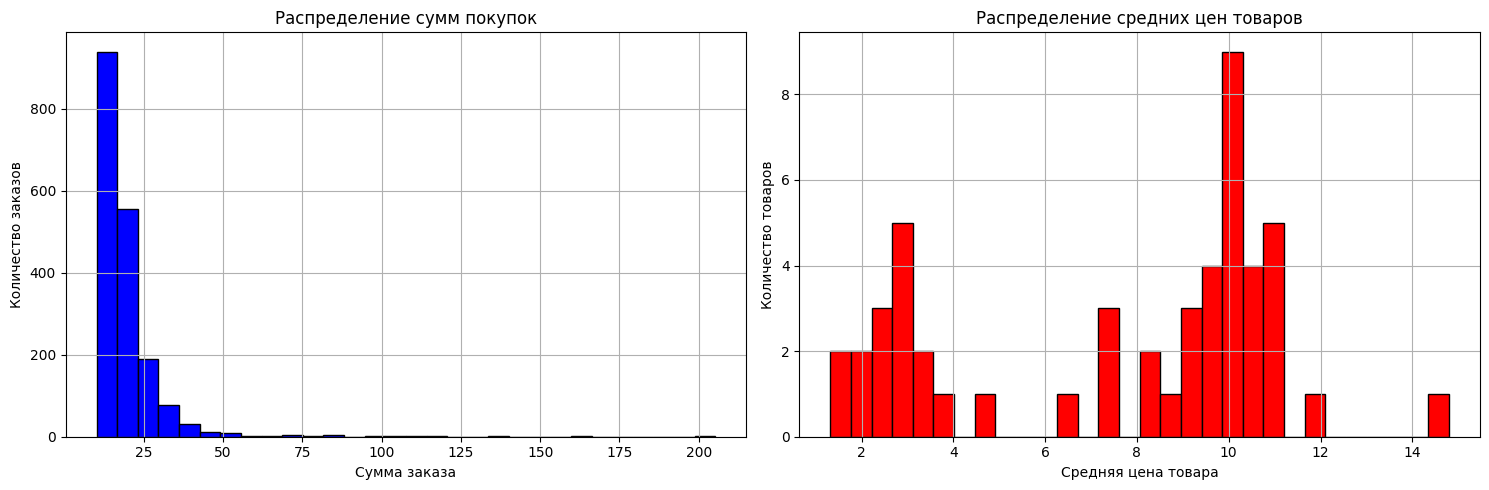

In [ ]:
1#
import matplotlib.pyplot as plt

orders_total = df.groupby('order_id')['item_price_num'].sum()

average_prices = df.groupby('item_name')['item_price_num'].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(orders_total, bins=30, color='blue', edgecolor='black')
axes[0].set_title('Распределение сумм покупок')
axes[0].set_xlabel('Сумма заказа')
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True)

axes[1].hist(average_prices, bins=30, color='red', edgecolor='black')
axes[1].set_title('Распределение средних цен товаров')
axes[1].set_xlabel('Средняя цена товара')
axes[1].set_ylabel('Количество товаров')
axes[1].grid(True)

plt.tight_layout()
plt.show()



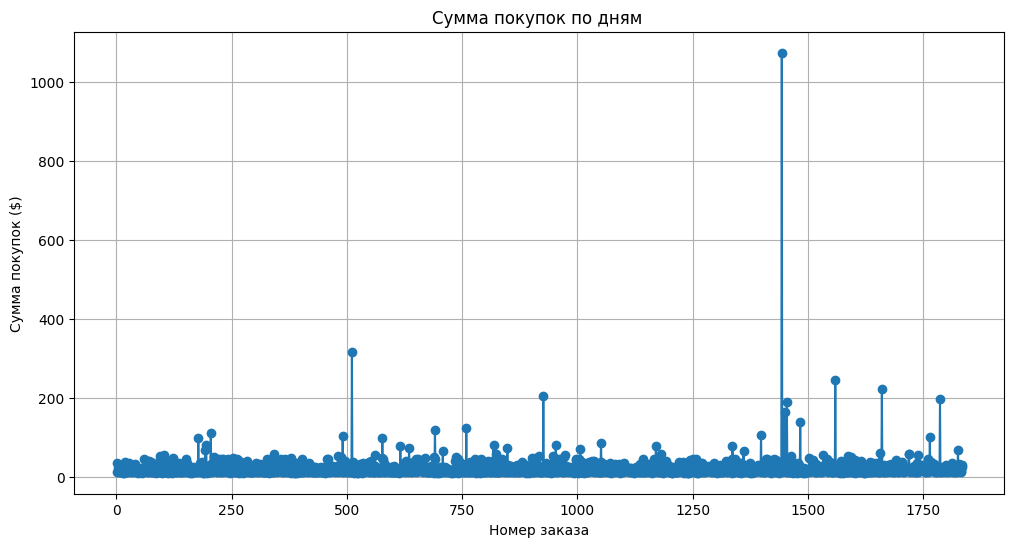

In [ ]:
2#
df['total_price'] = df['item_price_num'] * df['quantity']
daily_sales = df.groupby('order_id')['total_price'].sum()

plt.figure(figsize=(12,6))
daily_sales.plot(kind='line', marker='o')
plt.title('Сумма покупок по дням ')
plt.xlabel('Номер заказа')
plt.ylabel('Сумма покупок ($)')
plt.grid(True)
plt.show()

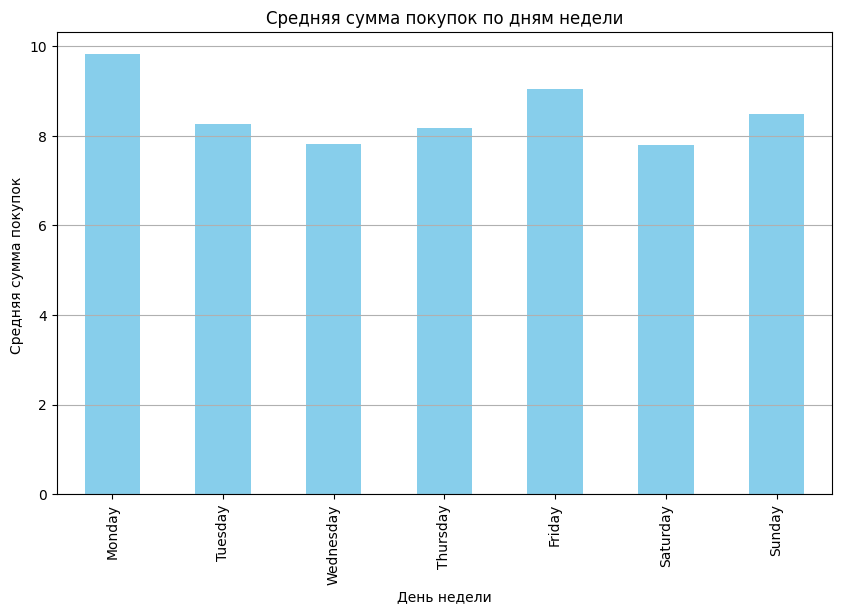

In [ ]:
3#
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

order_ids = df['order_id'].unique()
weekday_mapping = {order_id: weekdays[i % 7] for i, order_id in enumerate(order_ids)}
df['weekday'] = df['order_id'].map(weekday_mapping)

df['total_price'] = df['item_price_num'] * df['quantity']

avg_sales_by_day = df.groupby('weekday')['total_price'].mean().reindex(weekdays)

plt.figure(figsize=(10,6))
avg_sales_by_day.plot(kind='bar', color='skyblue')
plt.title('Средняя сумма покупок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя сумма покупок ($)')
plt.grid(axis='y')
plt.show()



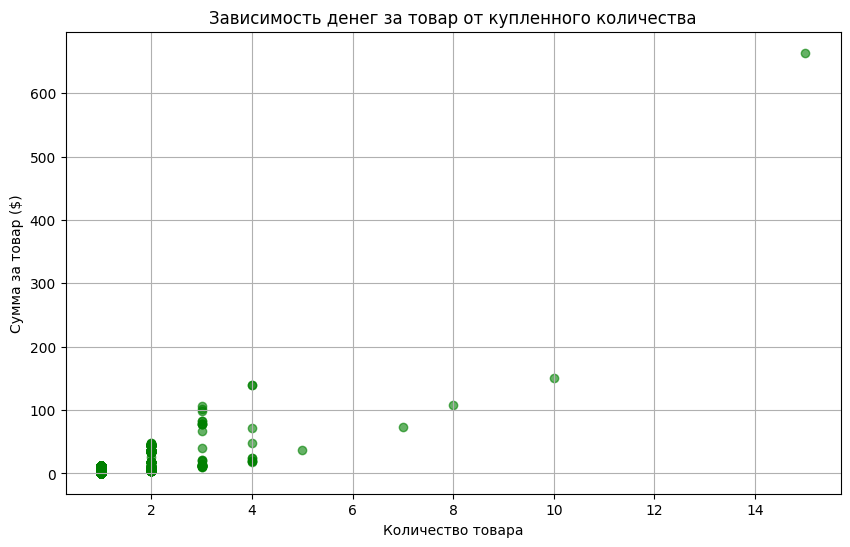

In [ ]:
4#
df['total_price'] = df['item_price_num'] * df['quantity']

plt.figure(figsize=(10,6))
plt.scatter(df['quantity'], df['total_price'], alpha=0.6, color='green')
plt.title('Зависимость денег за товар от купленного количества')
plt.xlabel('Количество товара')
plt.ylabel('Сумма за товар ($)')
plt.grid(True)
plt.show()

In [ ]:
plt.savefig('scatter_total_price_vs_quantity.pdf', format='pdf')

<Figure size 640x480 with 0 Axes>